# Algoritmi Avanzati, 02.04.2019
---

### EXERCISE 11
Given the iris dataset, split the dataset into training and test set; use 90% of data for training and 10% for testing. Implement least squares linear regression, using the pseudo-inverse to find the weights that minimize the linear model, in order to predict the PetalWidth using the PetalLength. In order to assess the performance of the model, compute the root mean square error on the test set. Then create a scatter plot of the data points in the two given dimensions, plotting with different colors the points belonging to the training or the test set. Also, plot the line that you have found by applying linear regression.

TIPS:
* you can use pandas.Dataframe.sample and pandas.Dataframe.drop to split the dataset
* to compute the pseudo-inverse of the linear system, you can use scipy.solve or define directly matrix operations using numpy operators

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

iris = pd.read_csv("Datasets/iris.data", names=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Label"])
iris = iris.drop(columns=['SepalWidth', 'SepalLength', 'Label'])
iris.head()

,PetalLength,PetalWidth
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [2]:
test_dataset = iris.sample(frac=0.1)
train_dataset = iris.drop(test_dataset.index)

x = np.array(train_dataset.drop(columns=['PetalWidth']))
y = np.array(train_dataset['PetalWidth'])

x = np.insert(x, 0, 1, axis=1)

w = np.matmul(
        np.matmul(
          np.linalg.inv(
              np.matmul(x.T, x)
          ),
          x.T
        ),
        y
    )

print("w*:", w)

w*: [-0.36618239  0.41644123]


**RMS Error:**

In [3]:
rms_sum, l = 0, 0

for test_x, test_y in zip(test_dataset['PetalLength'], test_dataset['PetalWidth']):
    prediction = 1*w[0] + test_x*w[1]
    rms_sum += (test_y - prediction)**2
    l += 1

RMS = np.sqrt(rms_sum/l)
print("RMS:", RMS)

RMS: 0.21558737499137143


**Scatter plot:**

<IPython.core.display.Javascript object>


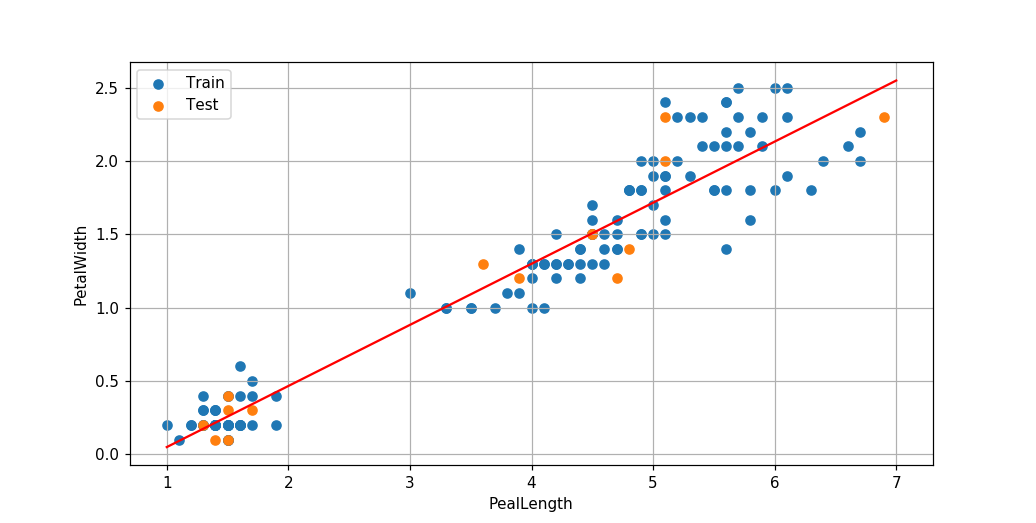

In [4]:
plt.scatter(train_dataset['PetalLength'], train_dataset['PetalWidth'], label='Train')
plt.scatter(test_dataset['PetalLength'], test_dataset['PetalWidth'], label='Test')

plt.grid(True)
plt.legend()
plt.xlabel('PealLength')
plt.ylabel('PetalWidth')

plt.plot([1, 7], [1*w[0] + 1*w[1], 1*w[0] + 7*w[1]], color='red')

plt.show()